# Informe TP Final - _Redes Neuronales_

### Integrantes: 
* *Andrés Maximiliano*
* *Dana Cossettini Reyes*

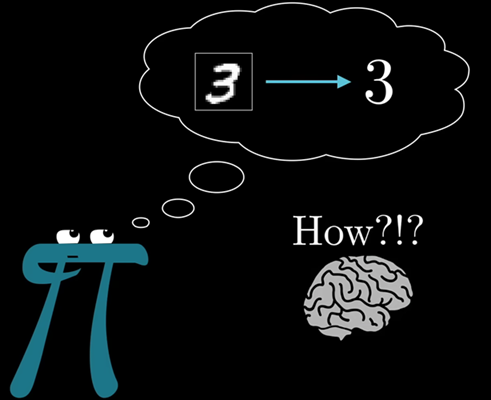



##  *Análisis de la Base de Datos*

### 1. Describe cada columna del conjunto de datos

Cada columna en el conjunto de datos representa la intensidad de un píxel en una imagen de 28x28 píxeles, en una escala de grises, lo que da un total de 784 columnas. Las primeras 784 columnas corresponden a la intensidad de cada píxel, esta representada del 0 (negro) al 255(blanco). La última columna de cada fila contiene la etiqueta de la imagen, un valor entre 0 y 9, que indica el dígito correspondiente.

Las primeras 784 columnas son variables discretas ya que pueden tomar cualquier valor dentro del rango 0 a 255, sin incluir número decimales.

La última columna es una variable categórica discreta ya que representan etiquetas, y tampoco pueden ser decimales. 

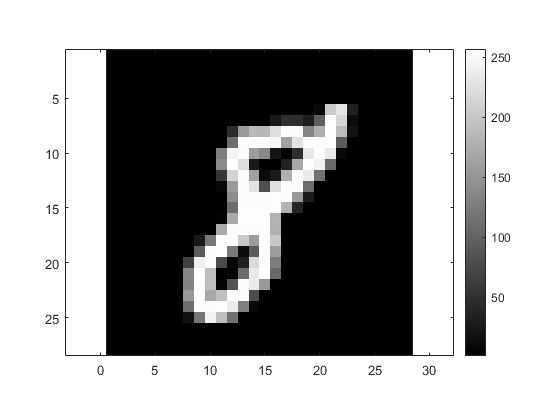

### 2. Análisis de Correlaciones

La relación entre las columnas generalmente no es muy fuerte ya que cada pixel tiene un valor independiente y valeria entre digito. Sin embargo, es posible encontrar cierta correlación entre píxeles adyacentes o cercanos en áreas comunes a distintos dígitos. Por ejemplo en el centro de la imágen, en la mayoría de los dígitos.

### 3. Análisis de Factibilidad 

Esta base de datos si es adecuada para entrenar una red neuronal porque cuenta con las características necesarias para que la red neuronal funcione correctamente. Por ejemplo, una gran base de datos, con mucha variedad. En donde cada dato está dimensionado y tiene etiquetas claras.

El propósito principal de nuestra red neuronal es identificar, a partir de imágenes, los dígitos que representan números del 0 al 9. El modelo tomará cada imagen como entrada y predecirá el dígito correspondiente que contiene. 

### 5. Transformaciones Preliminares

Las transformaciones necesarias en este caso además de transponer las columnas, fue la normalización de las columnas de los píxeles, de 0 a 1. Para evitar overflow y aumentar la rapidez de los cálculos. 

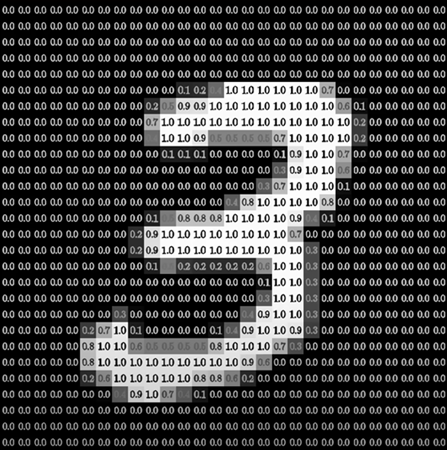



##  *Desarrollo de la Red Neuronal*

### 1. Arquitectura de la Red

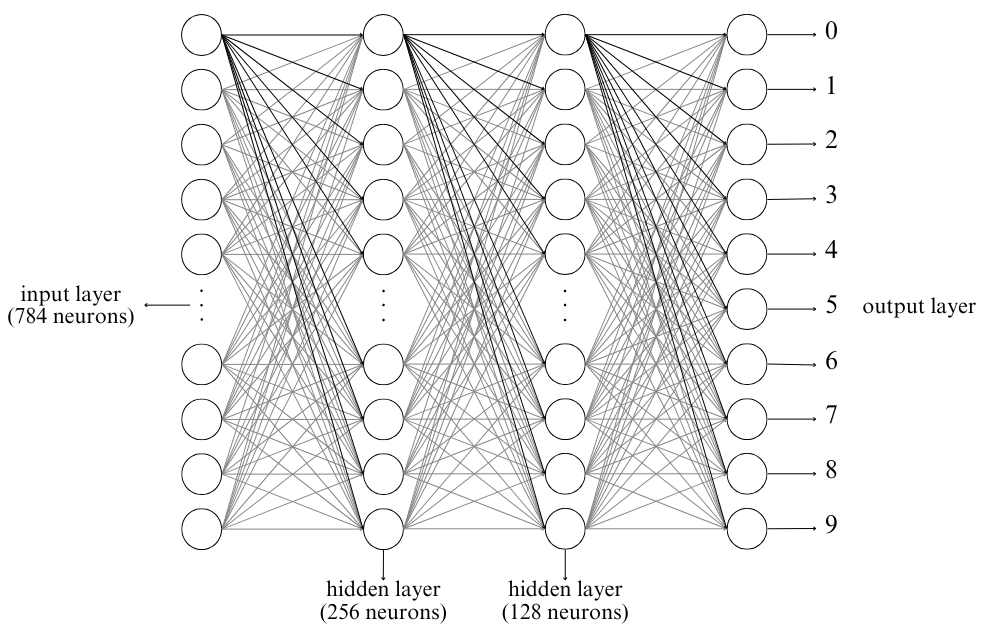

La red contará con:
* Una capa de entrada.
* Dos capas ocultas. 
* Una capa de salida. 

Las capas tendrán:
* Capa de entrada: 784 neuronas.
* Primera capa oculta: 256 neuronas.
* Segunda capa oculta: 128 neuronas.
* Capa de salida: 10 neuronas. 

Funciones de activación:

Para las dos capas ocultas de entrada vamos a utilizar la función **_ReLu_**. Decidimos usarla porque además de ser una función cómoda y fácil, a diferencia de otras funciones de activación la ReLu mantiene derivadas más grandes en las capas y esto hace que el aprendizaje sea más eficiente y rápido. 

Para la capa de salida de la última capa vamos a utilizar **_Softmax_**. Como nuestra red neuronal tiene muchas salidas, la Softmax permite que se puedan clasificar los tipos de salidas, al convertir un vector de números en una distribución de probabilidad, donde la suma de todos los elementos da 1. Por ejemplo, si la red produce valores como [2.0, 1.0, 0.1], la Softmax los convertirá en probabilidades como [0.7, 0.2, 0.1] que suman 1. Y esto nos da claridad para determinar la clase más probable para una imagen de entrada.

### 2. Implementación en numpy 

Inicialización de los pesos: 
Los pesos se inicializan con números _aleatorios distribuidos de manera normal_, y multiplicados por 0.01, para evitar la saturación de algunas neuronas. 

Cálculos de las activaciones para cada capa:
 $$ \begin{bmatrix} W_{1,1} & W_{1,2} & W_{1,3} &. . . & W_{1,784}\\ W_{2,1} & W_{2,2} & W_{2,3} &. . . & W_{2,784}\\ ... & ... & ... & ... & ...\\W_{256,1} & W_{256,2} & W_{256,3}&. . . & W_{256,784}\end{bmatrix} *\begin{bmatrix} X_1 \\ X_2 \\ ...  \\ X_{784} \end{bmatrix} + \begin{bmatrix} B_{1,1} \\ B_{2,1} \\ ...\\B_{256,1} \end{bmatrix} = \begin{bmatrix} Z_{1,1} \\ Z_{2,1} \\ ...\\ Z_{256,1}\end{bmatrix} → ReLu\begin{bmatrix} Z_{1,1} \\ Z_{2,1} \\ ...\\ Z_{256,1}\end{bmatrix} = \begin{bmatrix} A_{1,1} \\ A_{2,1} \\ ...\\ A_{256,1}\end{bmatrix} $$

 $$ \begin{bmatrix} W_{1,1} & W_{1,2} & W_{1,3} &. . . & W_{1,256}\\ W_{2,1} & W_{2,2} & W_{2,3} &. . . & W_{2,256}\\ ... & ... & ... & ... & ...\\W_{128,1} & W_{128,2} & W_{128,3}&. . . & W_{128,256}\end{bmatrix} *\begin{bmatrix} A_{1,1} \\ A_{2,1} \\ ...  \\ A_{256,1} \end{bmatrix} + \begin{bmatrix} B_{1,2} \\ B_{2,2} \\ ...\\B_{128,2} \end{bmatrix} = \begin{bmatrix} Z_{1,2} \\ Z_{2,2} \\ ...\\ Z_{128,2}\end{bmatrix}  → ReLu\begin{bmatrix} Z_{1,2} \\ Z_{2,2} \\ ...\\ Z_{128,2}\end{bmatrix} = \begin{bmatrix} A_{1,2} \\ A_{2,2} \\ ...\\ A_{128,2}\end{bmatrix} $$

 $$ \begin{bmatrix} W_{1,1} & W_{1,2} & W_{1,3} &. . . & W_{1,128}\\ W_{2,1} & W_{2,2} & W_{2,3} &. . . & W_{2,128}\\ ... & ... & ... & ... & ...\\W_{10,1} & W_{10,2} & W_{10,3}&. . . & W_{10,128}\end{bmatrix} *\begin{bmatrix} A_{1,2} \\ A_{1,2} \\ ...  \\ A_{128,2} \end{bmatrix} + \begin{bmatrix} B_{1,3} \\ B_{2,3} \\ ...\\B_{10,3} \end{bmatrix} = \begin{bmatrix} Z_{1,3} \\ Z_{2,3} \\ ...\\ Z_{10,3}\end{bmatrix}  → Softmax\begin{bmatrix} Z_{1,3} \\ Z_{2,3} \\ ...\\ Z_{10,3}\end{bmatrix} = \begin{bmatrix} A_{1,3} \\ A_{2,3} \\ ...\\ A_{10,3}\end{bmatrix} $$

 Funcion de costo:
 $$ L(y,s)=-Σ_{i=1}^C  y_i*log(S_i) $$

 Algoritmos de backpropagation
$$ \frac{dC}{dA_3}=\frac{dA_3}{dZ_3}*\frac{dZ_3}{dA_2}\frac{dA_2}{dZ_2}*\frac{dZ_2}{dA_2}*\frac{dA_1}{dZ_1} $$


$$ \frac{dC}{dW_3}=(A_3-1)*A_2 $$
$$ \frac{dC}{dB_3}=(A_3-1)*1 $$
$$ \frac{dC}{dW_2}=(A_3-1)*W_3*(ReLu'(Z_2))*A_1 $$
$$ \frac{dC}{dB_2}=(A_3-1)*W_3*(ReLu'(Z_2))*1 $$
$$ \frac{dC}{dW_1}=(A_3-1)*W_3*(ReLu'(Z_2))*W_2*(ReLu'(Z_1))*X $$
$$ \frac{dC}{dB_1}=(A_3-1)*W_3*(ReLu'(Z_2))*W_2*(ReLu'(Z_1))*1 $$

### 3. Entrenamiento y Evaluación

Primera prueba

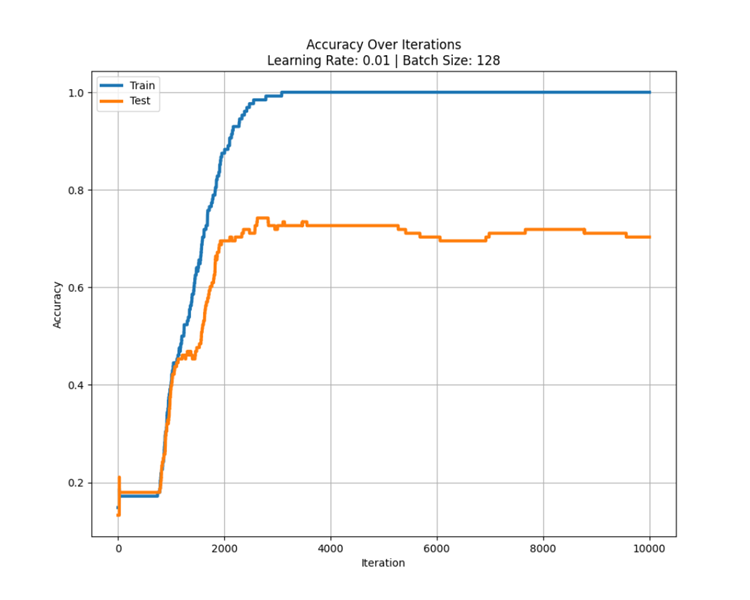

Última prueba

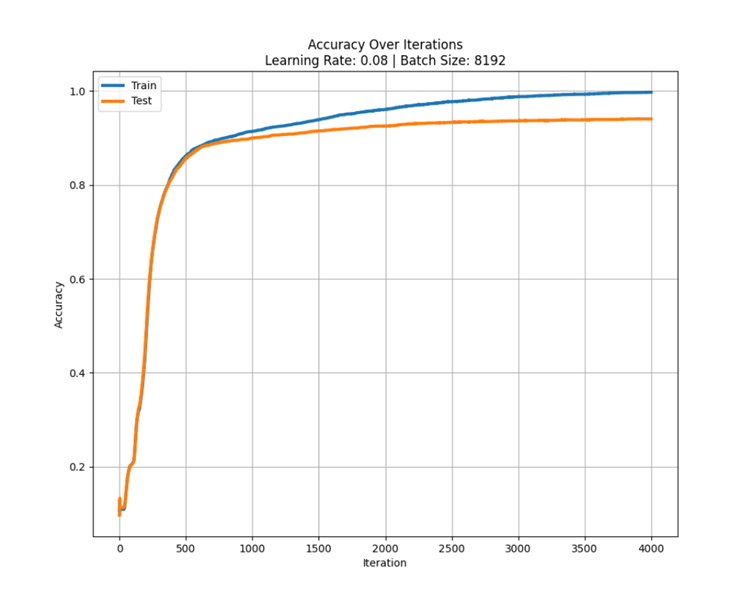

<div class="alert alert-block alert-info">
<b>Tip:</b> Se pueden observar más gráficos en la carpeta "graphs"
</div>


### 4. Análisis de Overfitting

Algunos de los modelos evaluados mostraron signos de overfitting, lo cual se evidencia cuando el porcentaje de accuracy en los datos de entrenamiento es muy alto, mientras que en los datos de prueba es significativamente más bajo. Esto indica que el modelo se está ajustando demasiado a los datos de entrenamiento. Como resultado, el rendimiento en el conjunto de entrenamiento es excepcional, pero el rendimiento en datos no vistos (test o validación) es deficiente, lo que significa que la red no será capaz de predecir nuevos datos función. Para manejar el overfitting, una de las cosas que se pueden hacer es entrenar la misma red con menos iteraciones para no mermar la accuracy de el test.

##  *Comparación con scikit-learn*

Resultaron bastantes parecidos los porcentajes de testeo obtenidos con la implementación en scikit-learn y la implementación manual. 

##  *Conclusión Final*

Construir una red neuronal desde cero nos ha permitido comprender mejor cómo las modificaciones en los parámetros influyen en los resultados. Entre las ventajas de realizar este proceso manualmente, se encuentra el control total sobre los parámetros. Sin embargo, esta misma característica puede resultar en una desventaja, ya que incluso una pequeña modificación puede alterar significativamente los resultados, lo que consume mucho tiempo en comparación con el uso de librerías que ajustan automáticamente estos parámetros.

Para concluir nos gustaría hacer una observación, y esta es que a pesar de los avances de las redes neuronales a lo largo de los años, aferrarse a la idea de una "verdad absoluta" puede ser un obstáculo. Nuestra experiencia con el desarrollo de esta red ha demostrado que, en ocasiones, el modelo comete errores sin darse cuenta. Aunque esto puede ser trivial en ciertos contextos (como este), en otras situaciones puede acarrear consecuencias graves (como el ejemplo del auto automatizado). También entendimos que las computadoras son mal llamadas inteligentes, realmente solo son rápidas. Porque sino no cometerían errores como esos. 
